<a href="https://colab.research.google.com/github/aafaf-arharas/Drawings-Classification/blob/main/Challenge_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Contexte

Ce deuxième notebook "Challenge_II"
 représente une évaluation de notre modèle obtenu avec le CNN. En effet, on a créé un nouveau dossier Images dans lequel on a mis 30 images de différentes classes: basket, eye, binoculars, rabbit,hand. On va télécharger le modèle CNN qu'on a enregistré dans le premier notebook "Challenge_I" pour l'appliquer sur les images du dossier Images et vérifier le résultat de la classification. La sortie de cette évaluation sera sous forme d'un fichier csv qui va englober, le nom de l'image traitée, sa classe réelle et la classe prédite à partir de notre modèle.


##Importation des bibliothèques

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2 
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Hiba_path
#path="/content/drive/MyDrive/Images/"
#Aafaf_path 
path = "/content/drive/MyDrive/examDL/ImagesTest/"
img_shape = (28, 28, 3)
img_size = img_shape[:2]


##Importation des données


La fonction get_data extrait les images contenues dans le dossier Images et les convertit en matrice de pixels pour qu'elle les rendra prêts à être évaluer par notre modèle, elle crée aussi un vecteur y contenant la classe de chaque image prise. La fonction renvoie pour chaque image parcourue la matrice des pixels , le nom de l'image et sa classe.

In [ ]:
def get_data(img_size):
    x = []  
    nom_img = []
    y = [] 
    listimg = os.listdir(path) 
    for img in listimg:
      nom_img.append(img)
      f = img.find('_')
      y_img = img[:f]
      y.append(y_img)
      img_ = load_img(path + "/" + img, target_size=img_size)  
      img_arr_t = img_to_array(img_)
      x.append(img_arr_t)
        
    return x,nom_img, y

In [ ]:
x,nom_img,y=get_data(img_size)
x=np.array(x)/255
print('Test shapes :',x.shape)

Test shapes : (40, 28, 28, 3)


Le script suivant évalue notre modèle appelé Challenge_AAFAF_HIBA.h5 sur les images issues du dossier images. Le résultat est plûtot bien, on n'a pas eu d'erreur en testant nos images ce qui affirme la précision qu'on a eu en évaluant le modèle sur les données test dans le premier notebook.
La sortie du script génère un fichier csv qui englobe le nom de l'image traitée, la classe de l'image prédite à partir de notre modèle et sa vraie classe.

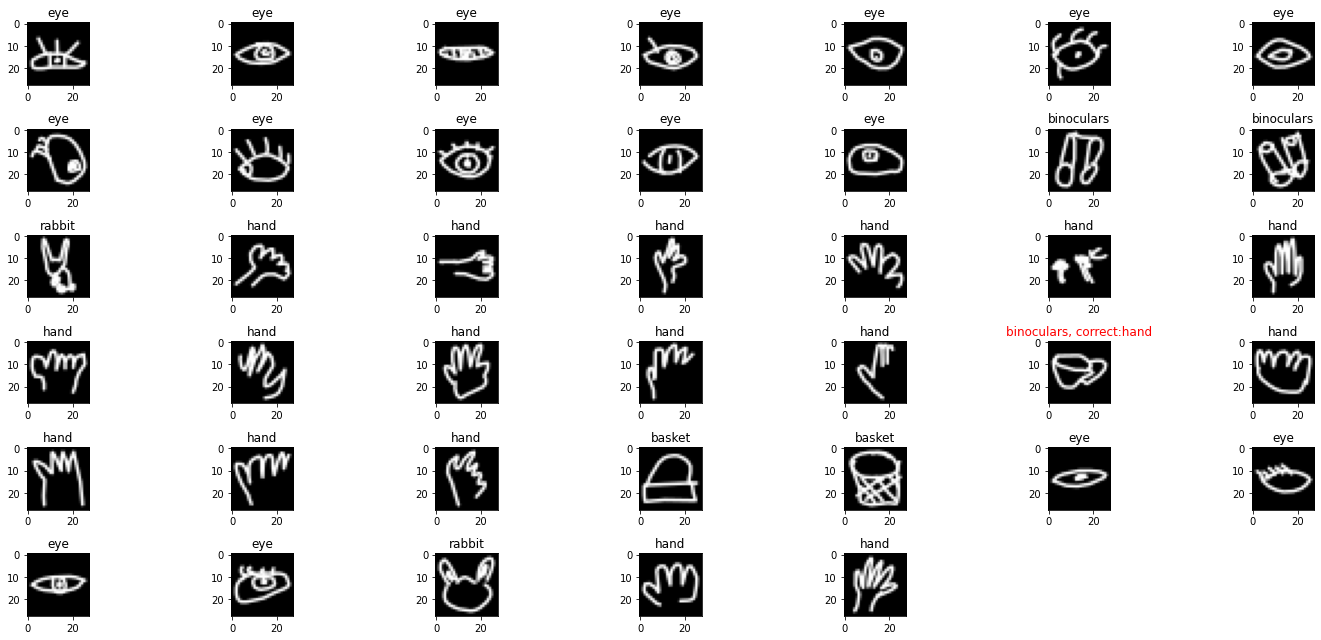

In [ ]:
num_classes = 5
model = load_model('/content/drive/MyDrive/examDL/Challenge_AAFAF_HIBA.h5')
classes = ["basket","eye","binoculars","rabbit","hand"]
image, label = x,y
predicted_classes = model.predict(image)
predicted_ids = [np.argmax(predicted_classes[i]) for i in range(len(image))]
predicted_classes = np.array([classes[id] for id in predicted_ids])

# Creation du fichier csv
entetes = [
     u'Image',
     u'classe_predictee',
     u'classe correcte',
]
f = open('/content/drive/MyDrive/examDL/Resultats_test.csv', 'w')
ligneEntete = ";".join(entetes) + "\n"
f.write(ligneEntete)


plt.figure(figsize=(20,9))
for n in range(len(image)):
    if predicted_classes[n] == label[n]:
        title = predicted_classes[n]
        color = "black"
    else:
        color = "red"
        title = f"{predicted_classes[n]}, correct:{label[n]}"
    ax = plt.subplot(6,7,n+1)
    fig=ax.imshow(array_to_img(x[n]))
    plt.title(title, color=color)

    # remplissage du fichier
    pre=predicted_classes[n].title()
    valeur=[nom_img[n], pre , y[n]]
    ligne = ";".join(valeur) + "\n"
    f.write(ligne)

f.close()
plt.tight_layout()
plt.show()
